In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('AverageDailySentiment')

In [3]:
df

,DATE,mean
0,2009-04-06,0.151274
1,2009-04-07,0.166819
2,2009-04-08,0.151094
3,2009-04-09,0.151094
4,2009-04-10,0.151094
...,...,...
76,2009-06-21,-0.026538
77,2009-06-22,-0.067278
78,2009-06-23,-0.055279
79,2009-06-24,-0.047212


<AxesSubplot:>

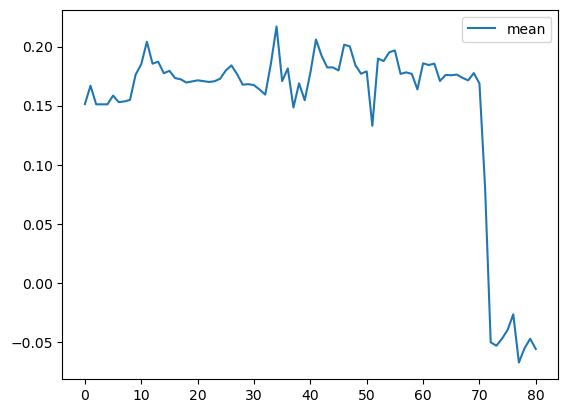

In [4]:
df.plot(method=scatter)

In [5]:
pip install statsmodels

In [13]:
import statsmodels.api as sm

model = sm.tsa.ExponentialSmoothing(df['mean'], trend="add", seasonal="add", seasonal_periods=7)
fitted_model = model.fit(smoothing_level=0.3, smoothing_trend=0.1, smoothing_seasonal=0.5)
forecast_horizon = 7
forecasts = fitted_model.forecast(steps=forecast_horizon)

print("Forecasts:", forecasts)


Forecasts: 81   -0.072425
82   -0.058327
83   -0.045006
84   -0.071917
85   -0.085870
86   -0.119986
87   -0.157419
dtype: float64


In [15]:
forecasts=pd.DataFrame(forecasts, columns = ['mean'])

In [16]:
forecasts

,mean
81,-0.072425
82,-0.058327
83,-0.045006
84,-0.071917
85,-0.085870
86,-0.119986
87,-0.157419


In [11]:
means =pd.DataFrame(df['mean'])
means

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
76,-0.026538
77,-0.067278
78,-0.055279
79,-0.047212


In [18]:
one_week = pd.concat([means, forecasts], axis = 0)
one_week

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
83,-0.045006
84,-0.071917
85,-0.085870
86,-0.119986


In [94]:
def hwes(alpha,beta,gamma, period):
    model = sm.tsa.ExponentialSmoothing(df['mean'], trend="add", seasonal="add", seasonal_periods=period)
    fitted_model = model.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
    forecast_horizon = 30 
    forecasts = fitted_model.forecast(steps=forecast_horizon)
    
    forecasts=pd.DataFrame(forecasts, columns = ['mean'])
    means =pd.DataFrame(df['mean'])
    one_week = pd.concat([means, forecasts], axis = 0)
    one_week.plot(kind='line')
    return one_week

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,-0.276787
107,-0.310903
108,-0.348336
109,-0.326981


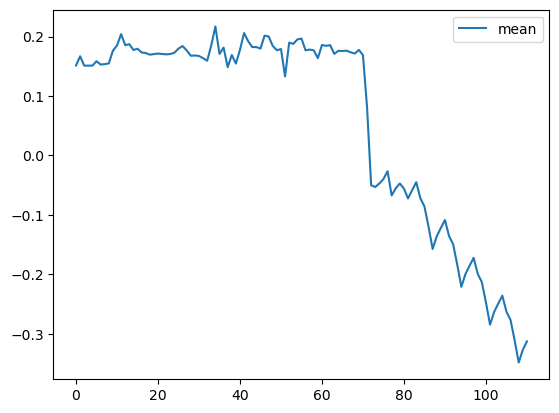

In [95]:
hwes(0.3,0.1,0.5,7)

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,-0.087246
107,-0.108870
108,-0.100828
109,-0.103160


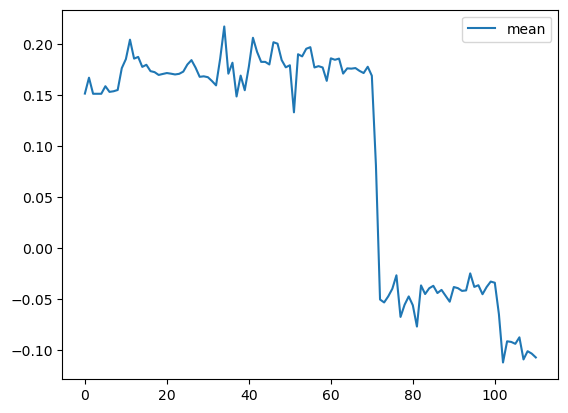

In [96]:
hwes(0.8,0.5,0.3,30)

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,-0.091856
107,-0.148288
108,-0.109622
109,-0.098340


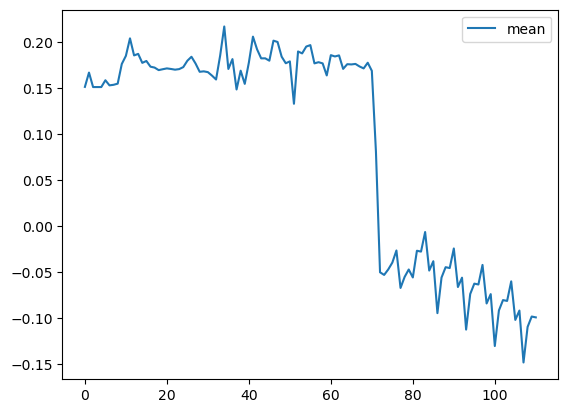

In [97]:
hwes(0.8,0.001,0.8,7)

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,0.032667
107,0.018280
108,0.016032
109,0.016673


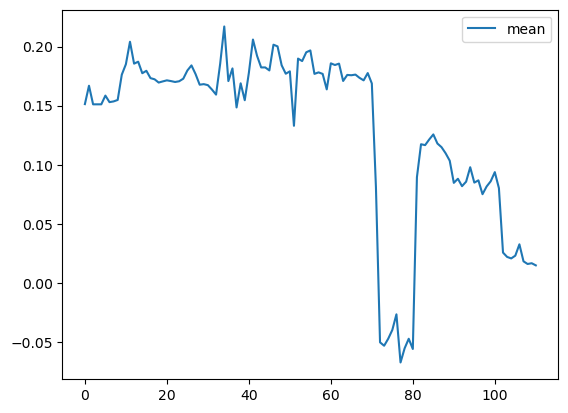

In [98]:
hwes(0.0001,0.01,0.001,30)

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,0.041668
107,0.027187
108,0.024838
109,0.025381


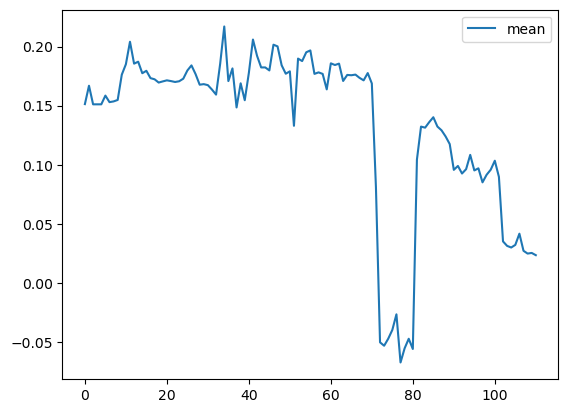

In [99]:
hwes(0.001,0.5,0.001,30)

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,0.010607
107,-0.011357
108,-0.010185
109,-0.007823


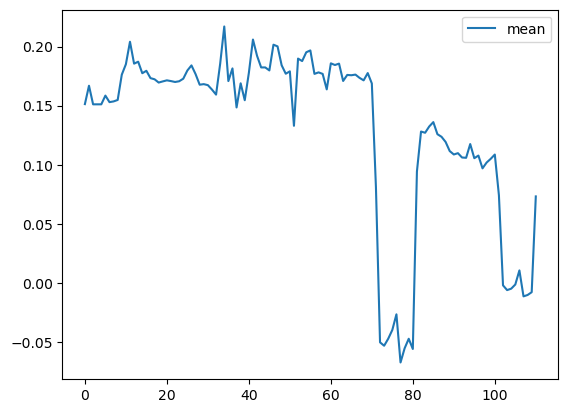

In [100]:
hwes(0.0001,0.9,0.5,30)

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,0.008535
107,-0.013396
108,-0.012198
109,-0.009818


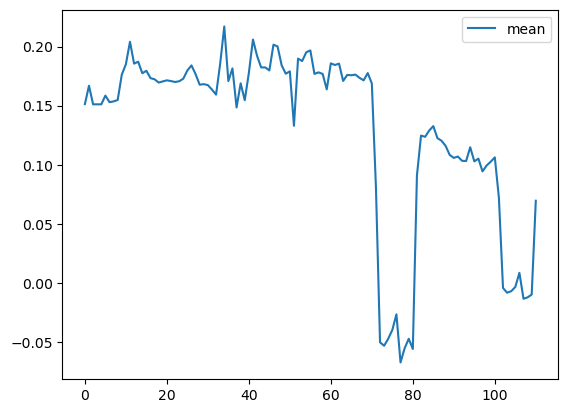

In [105]:
hwes(0.0001,0.001,0.5,30)

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,0.010814
107,-0.011154
108,-0.009985
109,-0.007626


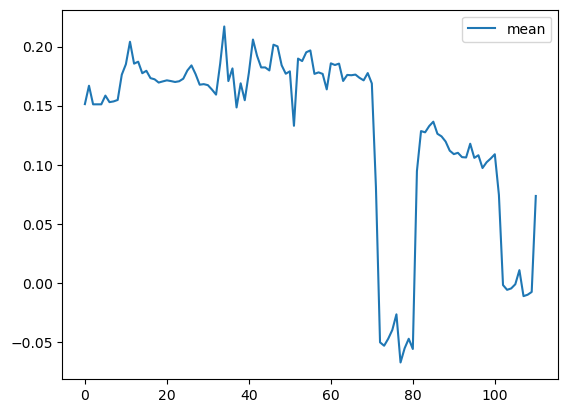

In [108]:
hwes(0.0001,0.999,0.5,30)

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,0.027116
107,0.008639
108,0.008091
109,0.009558


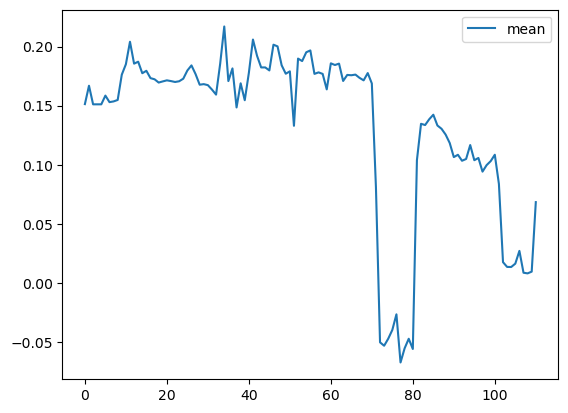

In [204]:
hwes(0.001,0.4,0.37,30)

,mean
0,0.151274
1,0.166819
2,0.151094
3,0.151094
4,0.151094
...,...
106,-0.009501
107,-0.040965
108,0.000198
109,0.005609


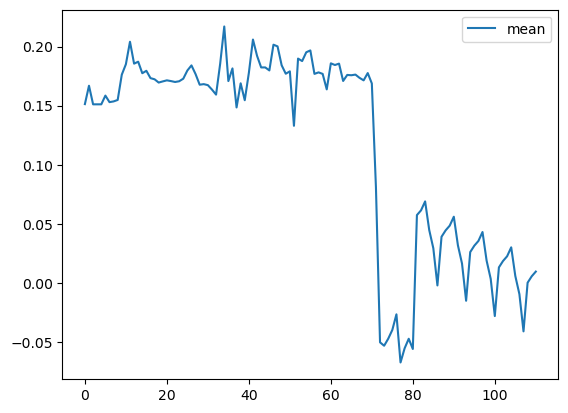

In [113]:
hwes(0.0001,0.5,0.4,7)

having determined the appropriate parameters for the forecasts

In [149]:
def hwesplot(distance):
    model = sm.tsa.ExponentialSmoothing(df['mean'], trend="add", seasonal="add", seasonal_periods=30)
    fitted_model = model.fit(smoothing_level=0.001, smoothing_trend=0.4, smoothing_seasonal=0.37)
    forecast_horizon = distance
    forecasts = fitted_model.forecast(steps=forecast_horizon)
    
    # create a new df from the forecasts
    forecasts=pd.DataFrame(forecasts, columns = ['mean'])
    means =pd.DataFrame(df['mean'])
    future_pred= pd.concat([means, forecasts], axis = 0)
    
    # add the date column back
    future_pred['Date'] = pd.date_range(start='2009-04-06', periods=81+distance, freq='D')
    # plot the forecasts
    future_pred.plot('Date','mean',kind='line')
    
    plt.legend().set_visible(False)
    plt.xlabel('Date')
    plt.ylabel('Mean sentiment')
    plt.title('Daily average sentiment forecast ')
    
    return future_pred

,mean,Date
0,0.151274,2009-04-06
1,0.166819,2009-04-07
2,0.151094,2009-04-08
3,0.151094,2009-04-09
4,0.151094,2009-04-10
...,...,...
83,0.133576,2009-06-28
84,0.138480,2009-06-29
85,0.142301,2009-06-30
86,0.133174,2009-07-01


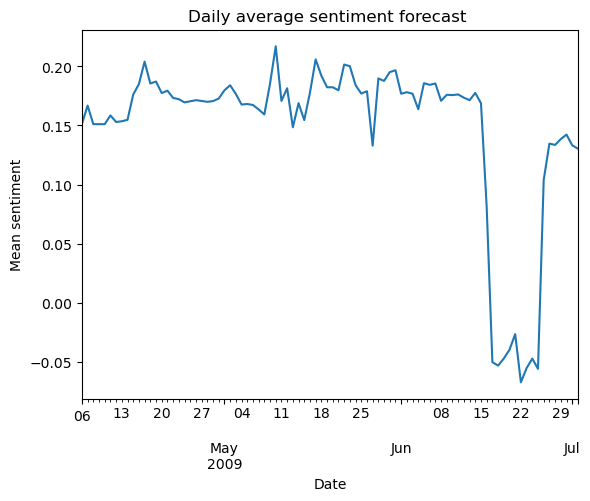

In [150]:
hwesplot(7)

,mean,Date
0,0.151274,2009-04-06
1,0.166819,2009-04-07
2,0.151094,2009-04-08
3,0.151094,2009-04-09
4,0.151094,2009-04-10
...,...,...
106,0.027116,2009-07-21
107,0.008639,2009-07-22
108,0.008091,2009-07-23
109,0.009558,2009-07-24


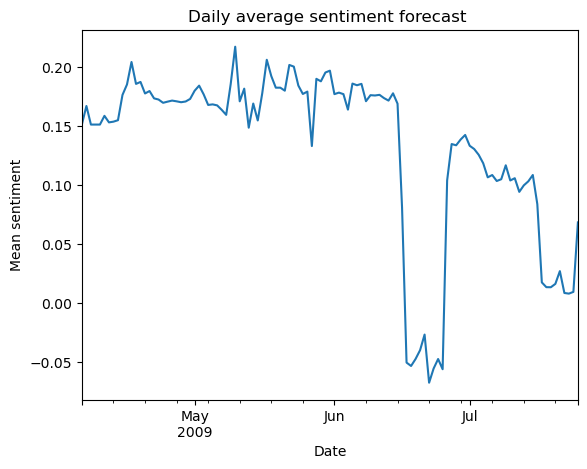

In [151]:
hwesplot(30)

,mean,Date
0,0.151274,2009-04-06
1,0.166819,2009-04-07
2,0.151094,2009-04-08
3,0.151094,2009-04-09
4,0.151094,2009-04-10
...,...,...
166,-0.057902,2009-09-19
167,-0.076379,2009-09-20
168,-0.076927,2009-09-21
169,-0.075460,2009-09-22


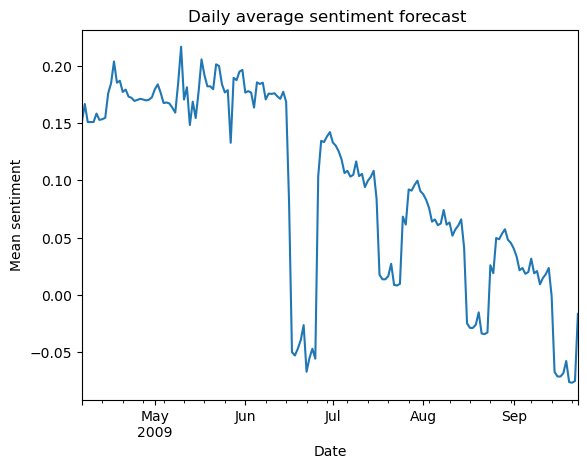

In [152]:
hwesplot(90)

In [172]:
import plotly.graph_objects as go
import plotly.express as px

In [175]:
        
def hwesplotly(distance):
    model = sm.tsa.ExponentialSmoothing(df['mean'], trend="add", seasonal="add", seasonal_periods=30)
    fitted_model = model.fit(smoothing_level=0.001, smoothing_trend=0.4, smoothing_seasonal=0.37)
    forecast_horizon = distance
    forecasts = fitted_model.forecast(steps=forecast_horizon)
    
    # create a new df from the forecasts
    forecasts=pd.DataFrame(forecasts, columns = ['mean'])
    means =pd.DataFrame(df['mean'])
    future_pred= pd.concat([means, forecasts], axis = 0)
    
    # add the date column back
    future_pred['Date'] = pd.date_range(start='2009-04-06', periods=81+distance, freq='D')
    
    # plot the forecasts using plotly to add figure, trace, and layout
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=future_pred['Date'], y=future_pred['mean'], mode='lines', name='Mean Sentiment'))
    fig.update_layout(
        title='Daily Average Sentiment Forecast',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Mean Sentiment'),
        showlegend=False,
        plot_bgcolor='rgba(0,0,0,0.05)'
    )
    return fig

In [176]:
hwesplotly(30)

In [188]:
pip install ipywidgets plotly


Note: you may need to restart the kernel to use updated packages.


In [202]:
import ipywidgets as widgets
from ipywidgets import interactive_output
import plotly.express as px
        
def hwesplotly(distance):
    model = sm.tsa.ExponentialSmoothing(df['mean'], trend="add", seasonal="add", seasonal_periods=30)
    fitted_model = model.fit(smoothing_level=0.001, smoothing_trend=0.4, smoothing_seasonal=0.37)
    forecast_horizon = distance
    forecasts = fitted_model.forecast(steps=forecast_horizon)
    
    # create a new df from the forecasts
    forecasts=pd.DataFrame(forecasts, columns = ['mean'])
    means =pd.DataFrame(df['mean'])
    future_pred= pd.concat([means, forecasts], axis = 0)
    
    # add the date column back
    future_pred['Date'] = pd.date_range(start='2009-04-06', periods=81+distance, freq='D')
    
    # plot the forecasts using plotly to add figure, trace, and layout
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=future_pred['Date'], y=future_pred['mean'], mode='lines', name='Mean Sentiment'))
    fig.update_layout(
        title='Daily Average Sentiment Forecast',
        xaxis=dict(title='Date'),
        yaxis=dict(title='Mean Sentiment'),
        showlegend=False,
        plot_bgcolor='rgba(0,0,0,0.05)'
    )
    fig.show()

# create dropdown
input_widget = widgets.Dropdown(
    options=[7, 14, 30, 60, 90],
    value=7,
    description='# of days:',
)
# pass input to graph
output = interactive_output(hwesplotly, {'distance': input_widget})

widgets.VBox([input_widget, output])